# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Adrian Alfajri
- **Email:** adrialfajri@gmail.com
- **ID Dicoding:** adrian_alfajri_1SdM

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca terhadap penyewaan sepeda?
- Apa tren penyewaan sepeda pada berbagai waktu dalam sehari dan hari dalam seminggu?

## Import Semua Packages/Library yang Digunakan

## Data Wrangling

### Gathering Data

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

day_data = pd.read_csv('/content/Bike-sharing-dataset/day.csv')
hour_data = pd.read_csv('/content/Bike-sharing-dataset/hour.csv')

day_data['dteday'] = pd.to_datetime(day_data['dteday'])
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])

print(day_data.head())
print(hour_data.head())

   instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant     dteday  season  y

### Assessing Data

In [10]:
print(day_data.info())
print(hour_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

### Cleaning Data

In [11]:
day_data.fillna(method='ffill', inplace=True)
hour_data.fillna(method='ffill', inplace=True)

print(day_data.isnull().sum())
print(hour_data.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


## Exploratory Data Analysis (EDA)

### Explore ...

In [13]:
## Mengeksplorasi data harian
print(day_data.describe())

          instant               dteday      season          yr        mnth  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    2.496580    0.500684    6.519836   
min      1.000000  2011-01-01 00:00:00    1.000000    0.000000    1.000000   
25%    183.500000  2011-07-02 12:00:00    2.000000    0.000000    4.000000   
50%    366.000000  2012-01-01 00:00:00    3.000000    1.000000    7.000000   
75%    548.500000  2012-07-01 12:00:00    3.000000    1.000000   10.000000   
max    731.000000  2012-12-31 00:00:00    4.000000    1.000000   12.000000   
std    211.165812                  NaN    1.110807    0.500342    3.451913   

          holiday     weekday  workingday  weathersit        temp       atemp  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.028728    2.997264    0.683995    1.395349    0.495385    0.474354   
min      0.000000    0.000000    0.000000    1.000000 

In [14]:
## Mengeksplorasi data per jam
print(hour_data.describe())

          instant                         dteday        season            yr  \
count  17379.0000                          17379  17379.000000  17379.000000   
mean    8690.0000  2012-01-02 04:08:34.552045568      2.501640      0.502561   
min        1.0000            2011-01-01 00:00:00      1.000000      0.000000   
25%     4345.5000            2011-07-04 00:00:00      2.000000      0.000000   
50%     8690.0000            2012-01-02 00:00:00      3.000000      1.000000   
75%    13034.5000            2012-07-02 00:00:00      3.000000      1.000000   
max    17379.0000            2012-12-31 00:00:00      4.000000      1.000000   
std     5017.0295                            NaN      1.106918      0.500008   

               mnth            hr       holiday       weekday    workingday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       6.537775     11.546752      0.028770      3.003683      0.682721   
min        1.000000      0.000000      0.0

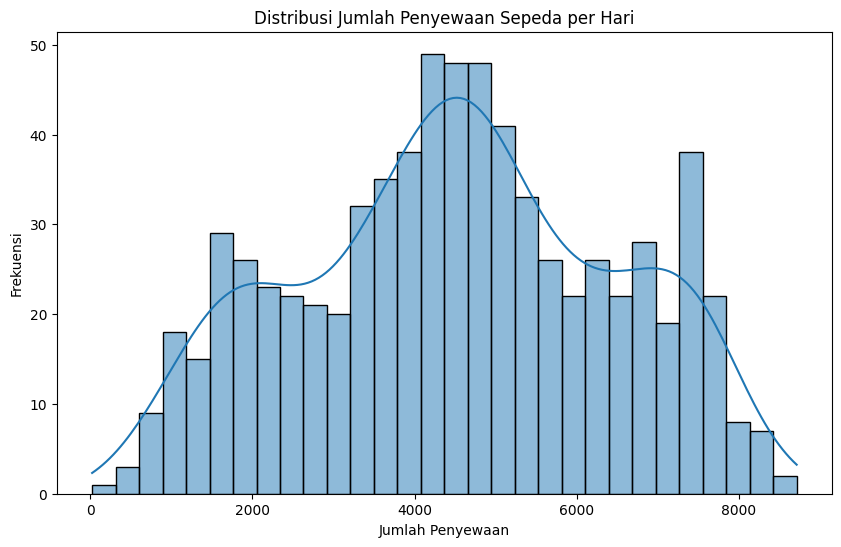

In [15]:
## Distribusi jumlah penyewaan sepeda per hari
plt.figure(figsize=(10, 6))
sns.histplot(day_data['cnt'], bins=30, kde=True)
plt.title('Distribusi Jumlah Penyewaan Sepeda per Hari')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
plt.show()

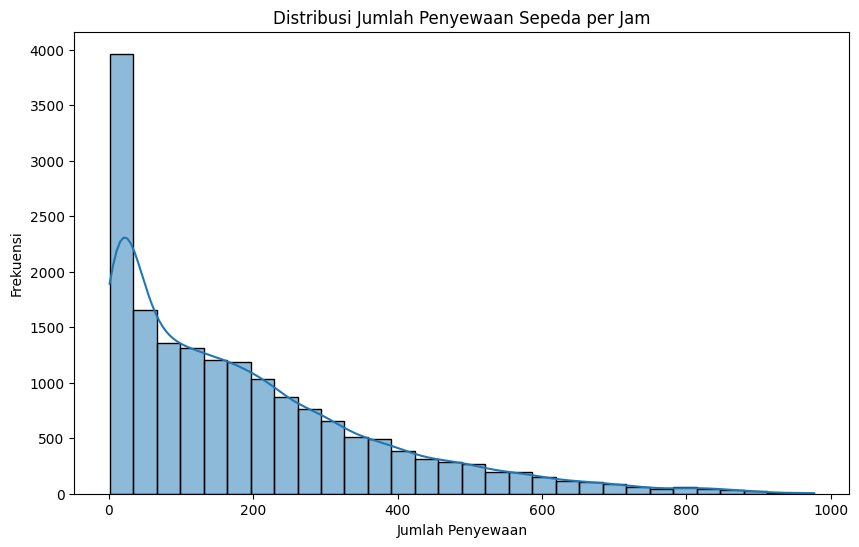

In [16]:
## Distribusi jumlah penyewaan sepeda per jam
plt.figure(figsize=(10, 6))
sns.histplot(hour_data['cnt'], bins=30, kde=True)
plt.title('Distribusi Jumlah Penyewaan Sepeda per Jam')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
plt.show()

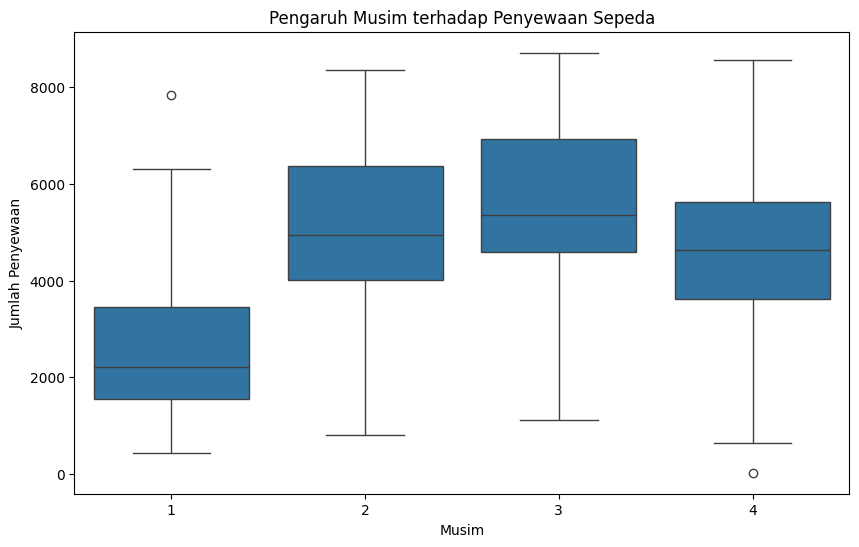

In [17]:
## Pengaruh musim terhadap penyewaan sepeda
plt.figure(figsize=(10, 6))
sns.boxplot(data=day_data, x='season', y='cnt')
plt.title('Pengaruh Musim terhadap Penyewaan Sepeda')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.show()

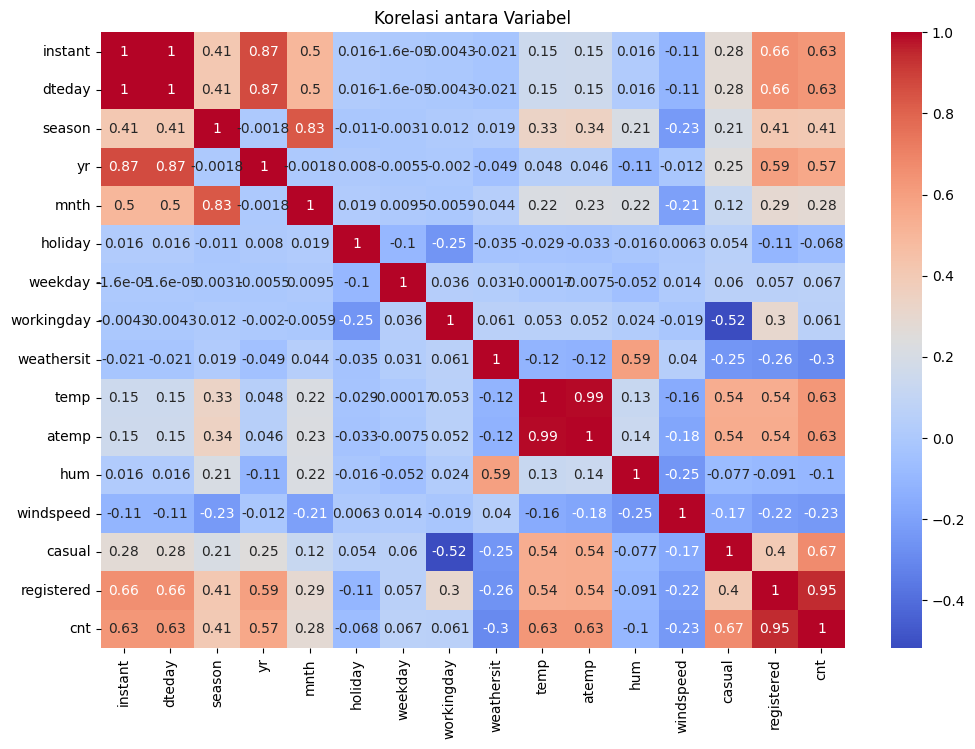

In [18]:
## Korelasi antara variabel
plt.figure(figsize=(12, 8))
sns.heatmap(day_data.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi antara Variabel')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh cuaca terhadap penyewaan sepeda?

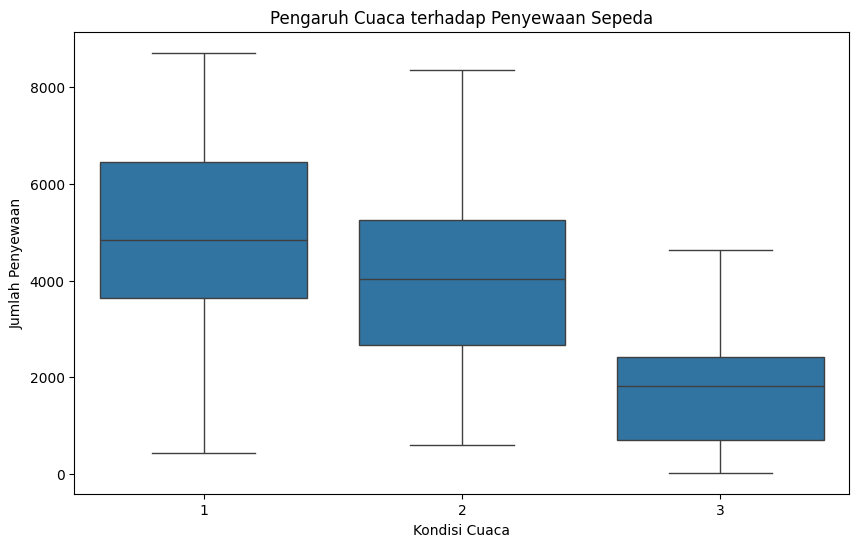

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=day_data, x='weathersit', y='cnt')
plt.title('Pengaruh Cuaca terhadap Penyewaan Sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewaan')
plt.show()

### Pertanyaan 2: Apa tren penyewaan sepeda pada berbagai waktu dalam sehari dan hari dalam seminggu?

<ipython-input-20-e3e0347be6bb>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=hour_data, x='hr', y='cnt', hue='weekday', ci=None)


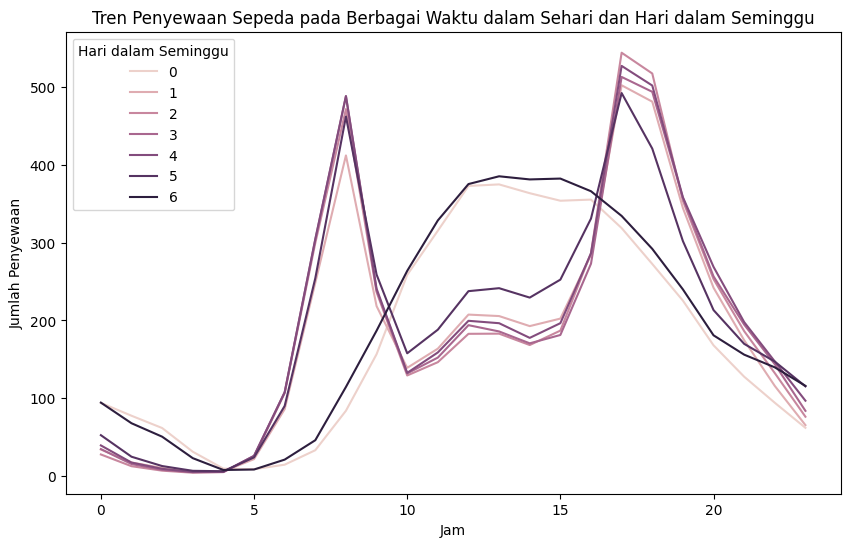

In [20]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=hour_data, x='hr', y='cnt', hue='weekday', ci=None)
plt.title('Tren Penyewaan Sepeda pada Berbagai Waktu dalam Sehari dan Hari dalam Seminggu')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.legend(title='Hari dalam Seminggu')
plt.show()

## Conclusion

- Conclution pertanyaan 1 : Cuaca memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda. Semakin buruk kondisi cuaca, semakin rendah jumlah penyewaan sepeda. Oleh karena itu, untuk meningkatkan jumlah penyewaan, penyedia layanan sepeda mungkin perlu menyediakan solusi untuk pengguna dalam kondisi cuaca yang kurang ideal.


- Conclution pertanyaan 2 : Jumlah penyewaan sepeda dipengaruhi oleh waktu dalam sehari dan hari dalam seminggu. Jam sibuk pagi dan sore pada hari kerja menunjukkan jumlah penyewaan yang tinggi, sementara akhir pekan menunjukkan pola yang lebih bervariasi dan lebih difokuskan pada penggunaan rekreasi. Informasi ini dapat digunakan oleh penyedia layanan sepeda untuk mengoptimalkan ketersediaan sepeda pada waktu-waktu puncak dan meningkatkan strategi pemasaran untuk penggunaan rekreasi pada akhir pekan.